<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:

from VoteRules3D import VoteResult3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl

style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')




In [49]:

def simulate(numTest,n,m,dimension):
    dict = {"n":[], "m":[], "Dimension":[], "Plurality":[], "Plurality Condorcet Criterion":[],
    "Copeland":[], "Copeland Condorcet Criterion":[], "STV":[], "STV Condorcet Criterion":[],
    "Borda":[], "Borda Condorcet Criterion":[], "STAR":[], "STAR Condorcet Criterion":[], "Plurality Veto": [], "Plurality Veto Condorcet Criterion": []}
    for i in range(numTest):
        test = VoteResult3D(n, m, dimension, distribution="uniform")
        dict["n"].append(n)
        dict["m"].append(m)
        dict["Dimension"].append(test.dimension)
        

        #winners 
        plurality = test.plurality()
        copeland = test.copeland()
        stv = test.STV()
        borda = test.borda()
        star = test.STAR()
        veto = test.pluralityVeto()
        dict["Plurality"].append(plurality)
        dict["Copeland"].append(copeland)
        dict["STV"].append(stv)
        dict["Borda"].append(borda)
        dict["STAR"].append(star)
        dict["Plurality Veto"].append(veto)

        dict["Plurality Condorcet Criterion"].append(test.condorcetCheck(plurality))
        dict["Copeland Condorcet Criterion"].append(test.condorcetCheck(copeland))
        dict["STV Condorcet Criterion"].append(test.condorcetCheck(stv))
        dict["Borda Condorcet Criterion"].append(test.condorcetCheck(borda))
        dict["STAR Condorcet Criterion"].append(test.condorcetCheck(star))
        dict["Plurality Veto Condorcet Criterion"].append(test.condorcetCheck(veto))

        

        
    df = pd.DataFrame(dict)
    df.to_csv('CondorcetCheck_uniform.csv', mode="a", header = None)

# Now you have a DataFrame df with the results of your simulations


In [50]:
dimension = ["1D", "2D", "3D"]
n=200
marray = [3, 5, 20, 35]

# for d in dimension:
for m in marray:
    simulate(1000, n, m, "1D")



In [61]:
main = pd.read_csv("CondorcetCheck.csv")

main.tail(10)

,Unnamed: 0,n,m,Dimension,Plurality,Plurality Condorcet Criterion,Copeland,Copeland Condorcet Criterion,STV,STV Condorcet Criterion,Borda,Borda Condorcet Criterion,STAR,STAR Condorcet Criterion,Plurality Veto,Plurality Veto Condorcet Criterion
16990,990,200,5,3D,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True
16991,991,200,5,3D,Candidate 2,False,Candidate 1,True,Candidate 4,False,Candidate 1,True,Candidate 1,True,Candidate 1,True
16992,992,200,5,3D,Candidate 2,True,Candidate 2,True,Candidate 2,True,Candidate 2,True,Candidate 2,True,Candidate 2,True
16993,993,200,5,3D,Candidate 1,False,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 1,False
16994,994,200,5,3D,Candidate 3,False,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
16995,995,200,5,3D,Candidate 0,False,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True
16996,996,200,5,3D,Candidate 1,False,Candidate 0,True,Candidate 1,False,Candidate 1,False,Candidate 0,True,Candidate 1,False
16997,997,200,5,3D,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True,Candidate 0,True
16998,998,200,5,3D,Candidate 0,False,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True,Candidate 4,True
16999,999,200,5,3D,Candidate 0,False,Candidate 2,True,Candidate 0,False,Candidate 2,True,Candidate 2,True,Candidate 2,True


In [64]:
# Assuming you have a DataFrame 'main' and a target value 'True'
target_value = True

# Group by 'Distribution' and calculate the percentage of each method choosing the OPT
condorcetCheck = main.loc[main["Dimension"] == "3D"].groupby("m").agg(
    Plurality_percentage=('Plurality Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Copeland_percentage=('Copeland Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STV_percentage=('STV Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    STAR_percentage=('STAR Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    Borda_percentage=('Borda Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100),
    PluralityVeto_percentage=('Plurality Veto Condorcet Criterion', lambda x: (x == target_value).sum() / x.count() * 100)
).reset_index()

condorcetCheck

,m,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,2,99.500000,100.0,99.400000,99.400000,99.500000,99.700000
1,3,89.889890,100.0,97.697698,97.797798,95.295295,98.798799
2,5,70.770771,100.0,92.192192,95.695696,91.191191,92.592593
3,20,21.580547,100.0,41.438703,37.183384,85.207700,71.327254
4,50,5.445026,100.0,14.345550,22.094241,83.874346,58.219895


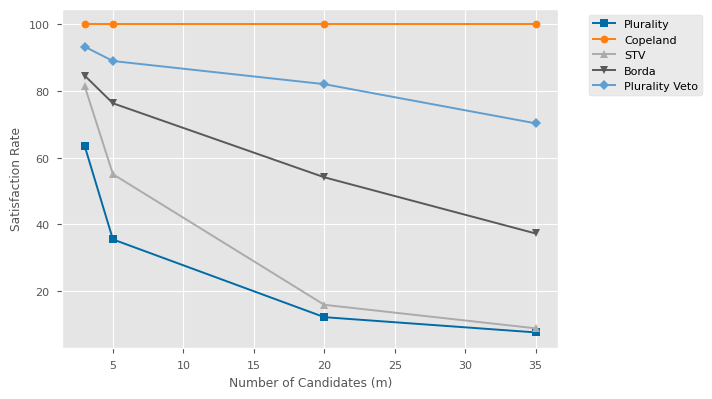

In [58]:
# import matplotlib.pyplot as plt
# df = condorcetCheck
# # List of columns you want to compare
# columns_to_compare = ["Plurality_percentage", "Copeland_percentage", "STV_percentage", "STAR_percentage", "Borda_percentage", "PluralityVeto_percentage"]

# # Transpose the DataFrame
# df = df.set_index("Dimension")[columns_to_compare].T

# # Plotting
# ax = df.plot(kind="bar", figsize=(10, 6))
# plt.xlabel("Method")
# plt.ylabel("Percentage")
# plt.title("Comparison of Percentages by Method and Dimension")
# plt.legend(title="Dimension", loc="upper left", bbox_to_anchor=(1, 1))
# plt.tight_layout()
# plt.show()

#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles1 = ['s-','o-','^-', 'v-','D-']


plt.plot(condorcetCheck.m, condorcetCheck["Plurality_percentage"], styles1[0], label="Plurality", color = CB_color_cycle[0])
plt.plot(condorcetCheck.m, condorcetCheck["Copeland_percentage"], styles1[1], label="Copeland",  color = CB_color_cycle[1])
plt.plot(condorcetCheck.m, condorcetCheck["STV_percentage"], styles1[2], label="STV", color = CB_color_cycle[2])
plt.plot(condorcetCheck.m, condorcetCheck["Borda_percentage"], styles1[3], label="Borda", color = CB_color_cycle[3])
plt.plot(condorcetCheck.m, condorcetCheck["PluralityVeto_percentage"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4])

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Satisfaction Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Show the plot
plt.show()

# df = pd.DataFrame(condorcetCheck)
# fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# efficiency_columns = ['Plurality_percentage', 'Borda_percentage', 
#                       'PluralityVeto_percentage', 'STV_percentage', 'Copeland_percentage']
# voting_rules = ['Plurality', 'Borda', 'Plurality Veto', 'STV', 'Copeland']
# for i, efficiency_type in enumerate(efficiency_columns):
#     row = i // 2
#     col = i % 2
#     ax = axes[row, col]
#     ax.set_title(f'{voting_rules[i]}')
#     if efficiency_type in df.columns:
#         for m_value in sorted(df['m'].unique()):
#             df_m = df[df['m'] == m_value]
#             ax.plot(df_m['n'], df_m[efficiency_type], marker='o', label=f'm={m_value}')
#         ax.grid(True)
#     ax.set_xlabel('n (Number of Voters)')
#     ax.set_ylabel('IIA Satisfaction Rate')

# # Hide empty subplots
# if len(efficiency_columns) < 6:
#     for i in range(len(efficiency_columns), 6):
#         row = i // 2
#         col = i % 2
#         fig.delaxes(axes[row, col])

# plt.tight_layout(pad=3.0)
# plt.legend(bbox_to_anchor=(1.2, 1), loc='upper left')
# plt.show()